# Check relationship between PNT and DS exhibit in component 2

In [1]:
cd -q ~/TaskSCCA_craddock/

In [2]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.stats import zscore

from src.data_cleaning import clean_confound, select_mad_percentile
from src.visualize import plot_mad_results

sns.set_style({"font.sans-serif": ["Arial"]})
sns.set_context('paper', font_scale=1.5)

In [3]:
path_master = 'reports/HW_cohort_taskCCA_full.csv'
df_master = pd.read_csv(path_master)

## Descriptive information

In [4]:
print('Digit span')
print('Mean: {}'.format(np.mean(df_master.DS_MeanSpan)))
print('SD: {}'.format(np.std(df_master.DS_MeanSpan)))
print('')
print('Picture naming')
print('Mean: {}'.format(np.mean(df_master.PNT_ACC)))
print('SD: {}'.format(np.std(df_master.PNT_ACC)))

Digit span
Mean: 6.126404494382022
SD: 1.1114973676001432

Picture naming
Mean: 0.887958801488764
SD: 0.05839737137529475


## Split by CCA 2 score, bottom 10% to top 10%; raw scores

/home/hw1012/TaskSCCA_craddock/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

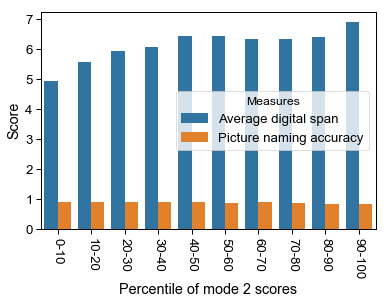

In [5]:
df_task = pd.concat([df_master['CCA_2'], df_master.loc[:, 'DS_MeanSpan':'Feat_EFF']], axis=1)
df_task = df_task.sort_values('CCA_2')
df_task['bin'] = pd.qcut(df_task['CCA_2'], 10, 
                         labels=['{}-{}'.format(l, u) for l, u in zip(range(0, 100, 10), range(10, 110, 10))])

df_DS_PNT = df_task.loc[:, ['DS_MeanSpan', 'PNT_ACC', 'bin']]
df_DS_PNT.columns = ['Average digital span', 'Picture naming accuracy', 'Percentile of mode 2 scores']
df_DS_PNT["id"] = df_DS_PNT.index
df_DS_PNT = pd.melt(df_DS_PNT, id_vars=['id', 'Percentile of mode 2 scores'], value_name='Score', var_name='Measures')

plt.figure(figsize=(6, 4))
sns.barplot(x='Percentile of mode 2 scores', y='Score', hue='Measures', data=df_DS_PNT, ci=0)
plt.xticks(rotation=-90)

## Split by CCA 2 score, bottom 10% to top 10%; zscores

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

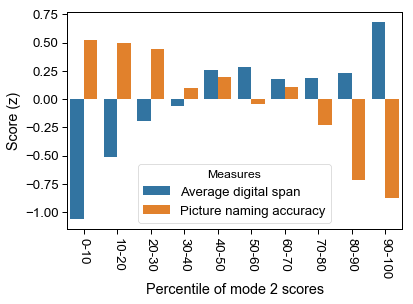

In [6]:
df_task = pd.concat([df_master['CCA_2'], df_master.loc[:, 'DS_MeanSpan':'Feat_EFF']], axis=1)
df_task = df_task.sort_values('CCA_2').apply(zscore)
df_task['bin'] = pd.qcut(df_task['CCA_2'], 10, 
                         labels=['{}-{}'.format(l, u) for l, u in zip(range(0, 100, 10), range(10, 110, 10))])

df_DS_PNT = df_task.loc[:, ['DS_MeanSpan', 'PNT_ACC', 'bin']]
df_DS_PNT.columns = ['Average digital span', 'Picture naming accuracy', 'Percentile of mode 2 scores']
df_DS_PNT["id"] = df_DS_PNT.index
df_DS_PNT = pd.melt(df_DS_PNT, id_vars=['id', 'Percentile of mode 2 scores'], value_name='Score (z)', var_name='Measures')

plt.figure(figsize=(6, 4))
sns.barplot(x='Percentile of mode 2 scores', y='Score (z)', hue='Measures', data=df_DS_PNT, ci=0)
plt.xticks(rotation=-90)

In [7]:
mode2_color = pd.read_csv('reports/figures/CCA/task_canonicalweights_wordcloud_colors_2.csv')

mode2_color = mode2_color.sort_values('weight', ascending=False)
mode2_color

,Unnamed: 0,weight,word,color
2,2,59,Picture~Naming,#2b73b3
1,1,50,Category~Fluency,#3f8ec0
3,3,46,TS-Flexibility,#db6b55
0,0,40,Digit~Span,#e58368
12,12,17,Semantics-Feature,#fcd7c2
7,7,4,RAPM,#ecf2f5
4,4,0,TS-Inhibition,#f7f6f6
5,5,0,Four~Mountains,#f7f6f6
6,6,0,Unusual~Uses,#f7f6f6
8,8,0,Paired~Associate,#f7f6f6


In [8]:
df_task = pd.concat([df_master['CCA_2'], df_master.loc[:, 'DS_MeanSpan':'Feat_EFF']], axis=1)
df_task = df_task.sort_values('CCA_2').apply(zscore)
df_task['bin'] = pd.qcut(df_task['CCA_2'], 10, 
                         labels=['{}-{}%'.format(l, u) for l, u in zip(range(0, 100, 10), range(10, 110, 10))])
df_task = df_task.loc[:, ('PNT_ACC', 'VF', 'Feat_EFF', 'DS_MeanSpan','TS_SWITCHCOST', 'bin')]
df_task.VF *= -1 
df_task.columns = ['Picture naming accuracy', 'Category fluency',
                   'Semantics-Feature', 'Average digital span', 'TS-Flexibility', 
                   'Percentile of mode 2 scores']

df_task["id"] = df_task.index
df_task = pd.melt(df_task, id_vars=['id', 'Percentile of mode 2 scores'], value_name='Score (z)', var_name='Measures')

In [9]:
mode2_color_order = ['#2b73b3', '#3f8ec0', '#fcd7c2', '#e58368', '#db6b55']
sns.set_palette(mode2_color_order)

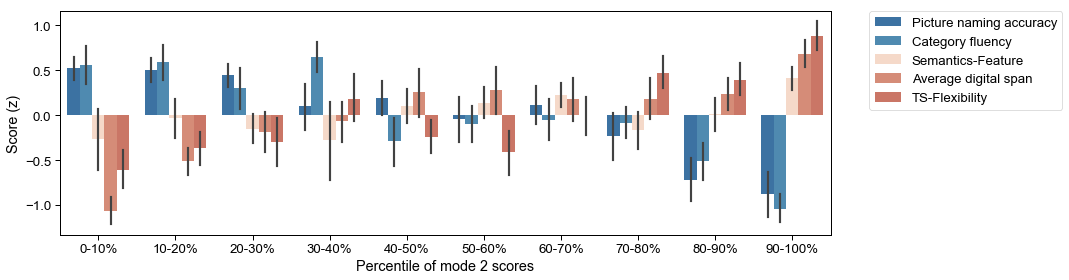

In [10]:
plt.figure(figsize=(15, 4))
#If you have normally distributed data, 
# then the 68% confidence interval will correspond to the standard error of the mean.
sns.barplot(x='Percentile of mode 2 scores', y='Score (z)', hue='Measures', 
            data=df_task, ci=68)  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.savefig('reports/manuscript/figures/mode2trend_z.png', transparent=True, dpi=300)

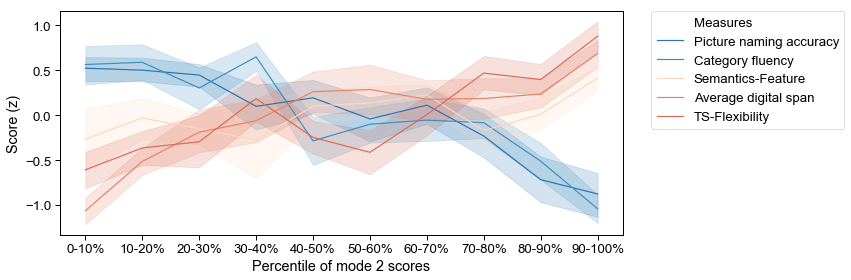

In [11]:
plt.figure(figsize=(12, 4))
#If you have normally distributed data, 
# then the 68% confidence interval will correspond to the standard error of the mean.
sns.lineplot(x='Percentile of mode 2 scores', y='Score (z)', hue='Measures', 
            data=df_task, ci=68)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.savefig('reports/manuscript/figures/mode2trend_z_ribbons.png', transparent=True, dpi=300)